In [3]:

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from deepface import DeepFace

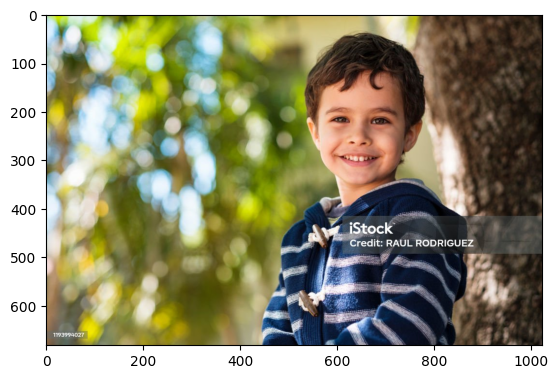

In [4]:
img= cv2.imread("E:\emotion recognation\happ_face.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
predictions= DeepFace.analyze(img)
predictions

Action: race: 100%|██████████| 4/4 [00:14<00:00,  3.55s/it]   


[{'emotion': {'angry': np.float32(3.0865062e-13),
   'disgust': np.float32(4.665822e-19),
   'fear': np.float32(5.0464288e-15),
   'happy': np.float32(99.99646),
   'sad': np.float32(1.711447e-09),
   'surprise': np.float32(8.4915734e-11),
   'neutral': np.float32(0.0035408412)},
  'dominant_emotion': 'happy',
  'region': {'x': 534,
   'y': 134,
   'w': 221,
   'h': 221,
   'left_eye': (685, 222),
   'right_eye': (604, 218)},
  'face_confidence': np.float64(0.9),
  'age': 21,
  'gender': {'Woman': np.float32(3.857331), 'Man': np.float32(96.14266)},
  'dominant_gender': 'Man',
  'race': {'asian': np.float32(17.266891),
   'indian': np.float32(3.5370033),
   'black': np.float32(0.54312044),
   'white': np.float32(21.659304),
   'middle eastern': np.float32(4.833959),
   'latino hispanic': np.float32(52.159725)},
  'dominant_race': 'latino hispanic'}]

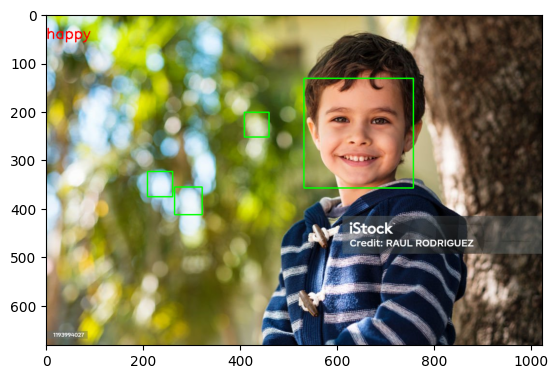

In [6]:
facecascade= cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces= facecascade.detectMultiScale(gray, 1.1,4)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
font= cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, 
            predictions[0]['dominant_emotion'],
            (0,50),
            font,1,
            (0,0,255),
            2,
            cv2.LINE_4)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))



Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]   


[{'emotion': {'angry': np.float32(0.114720814),
   'disgust': np.float32(5.2891666e-23),
   'fear': np.float32(0.11736571),
   'happy': np.float32(1.044103e-06),
   'sad': np.float32(99.72771),
   'surprise': np.float32(3.4199837e-10),
   'neutral': np.float32(0.04020224)},
  'dominant_emotion': 'sad',
  'region': {'x': 25,
   'y': 0,
   'w': 363,
   'h': 363,
   'left_eye': (276, 104),
   'right_eye': (202, 252)},
  'face_confidence': np.float64(0.9),
  'age': 31,
  'gender': {'Woman': np.float32(88.92048), 'Man': np.float32(11.079516)},
  'dominant_gender': 'Woman',
  'race': {'asian': np.float32(2.242999),
   'indian': np.float32(13.720593),
   'black': np.float32(0.3734268),
   'white': np.float32(23.548676),
   'middle eastern': np.float32(21.62677),
   'latino hispanic': np.float32(38.48754)},
  'dominant_race': 'latino hispanic'}]

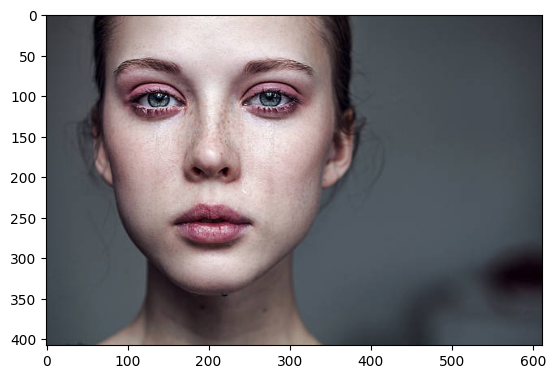

In [7]:
img2= cv2.imread('E:\emotion recognation\sad_women.jpg')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

predictions2= DeepFace.analyze(img2)
predictions2


In [ ]:

facecascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

cap = cv2.VideoCapture(1)  # 1 is the default camera

if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot Open Web Cam")

while True:
    ret, frame = cap.read()

    if not ret:
        break

    result = DeepFace.analyze(frame, actions=['emotion'])
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,
                result[0]['dominant_emotion'],
                (50, 50),
                font, 1,
                (0, 0, 255),
                2,
                cv2.LINE_4)

    # Display the video frame
    cv2.imshow('Demo Video', frame)

    # Press 'q' to exit the video window
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

ValueError: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.

: 